### 岭回归

### 目标：$$J(\theta)={{MSE}(y, \hat y;\theta)+\alpha\frac{1}{2}{\sum_{i=1}^n}{\theta_i^2}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

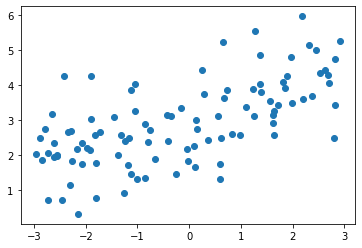

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
X.shape

(100, 1)

In [6]:
x.shape

(100,)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ('ploy', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [10]:
from sklearn.metrics import mean_squared_error
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

182.6398531015617

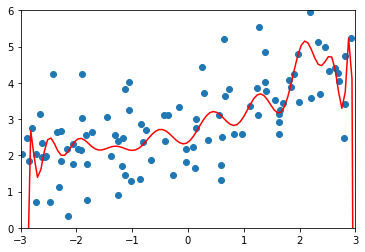

In [12]:
X_polt = np.linspace(-3, 3, 100).reshape(100, 1)
y_polt = poly_reg.predict(X_polt)

plt.scatter(x, y)
plt.plot(X_polt[:, 0], y_polt, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [13]:
def plot_model(model):
    X_polt = np.linspace(-3, 3, 100).reshape(100, 1)
    y_polt = model.predict(X_polt)

    plt.scatter(x, y)
    plt.plot(X_polt[:, 0], y_polt, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

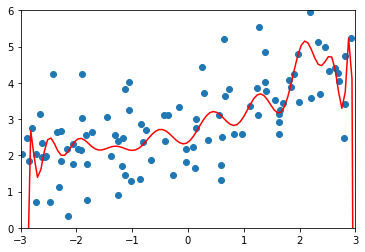

In [14]:
plot_model(poly_reg)

### 使用岭回归

In [15]:
from sklearn.linear_model import Ridge
def RidgeRegression(degree, alpha):
    return Pipeline([
        ('ploy', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

In [16]:
ridge1_reg = RidgeRegression(degree=20, alpha=0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3015941455553315

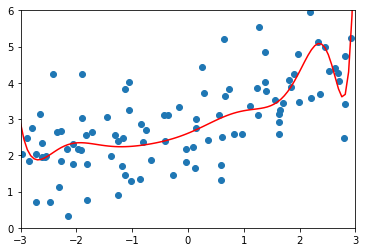

In [17]:
plot_model(ridge1_reg)

In [18]:
ridge2_reg = RidgeRegression(degree=20, alpha=1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1812445527250302

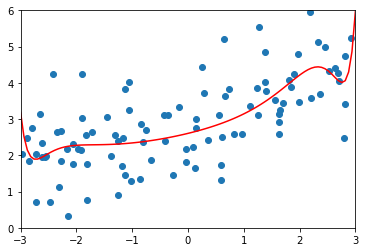

In [19]:
plot_model(ridge2_reg)

In [20]:
ridge3_reg = RidgeRegression(degree=20, alpha=100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3391837269887876

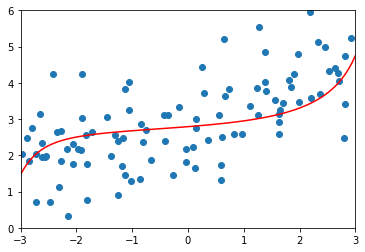

In [21]:
plot_model(ridge3_reg)